In [23]:
##*******************************************************************************************************##
##                     	  Part4: CNN Training and evaluation                                             ##          
##*******************************************************************************************************##

############################# Step1: load pacakge #####################
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import activations
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import KFold,StratifiedKFold
from keras.layers import Dense,Dropout, Flatten, Conv1D, Conv2D, MaxPooling1D,MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,auc, roc_curve,classification_report, confusion_matrix,average_precision_score, precision_recall_curve
from keras.callbacks import ModelCheckpoint
from sklearn.utils import resample

############################# Step2: load metrics function #####################
### F1 score, precision, recall and accuracy metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [5]:
# ! pip install tensorflow

In [6]:
df=pd.read_csv("merged_training_data.csv")
df

,Unnamed: 0.1,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,...,2030247,2377766,2598379,2814783,3716166,3888876,4266800,4266830,4361572,4548647
0,0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,39,Poultry (Meat),poultry,SAMN19025268,SRR14434490,south_africa,3.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,40,Bovine (Fecal),bovine,SAMN19025267,SRR14434491,south_africa,3.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,41,Bovine (Fecal),bovine,SAMN19025266,SRR14434492,south_africa,3.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,42,Bovine (Fecal),bovine,SAMN19025257,SRR14434493,south_africa,3.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# categories=["bovine","poultry","swine"]
# df=df[df["category"].isin(categories)]
# df=df.drop(columns=["Unnamed: 0.1"])

In [20]:
df.to_csv("updated_merged_training_data.csv")

In [39]:
X=df.drop(columns=["category","BioSample","sra_accession","country","Isolation source"])
y=df["category"]
y
from sklearn.preprocessing import LabelEncoder
# Assuming you have a DataFrame named df with a "category" column
# Extract the "category" column as a pandas Series
y = df["category"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the extracted Series
encoded_labels = label_encoder.fit_transform(y)
# encoded_labels

In [41]:
# One-hot encode the target variable y
y_encoded = pd.get_dummies(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, encoded_labels, test_size=0.2, random_state=42)


In [51]:
inputs = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
inputs = inputs.astype('float32')
targets = to_categorical(y_train)
inputs.shape,targets.shape

X_test2 = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test2 = X_test2.astype('float32')
y_test2 = to_categorical(y_test)
X_test2.shape,y_test2.shape

############################# Step4: model training #####################
batch_size = 8
no_classes = 3
no_epochs = 50
verbosity = 1
num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
model_history=[]
for train, test in kfold.split(inputs, targets):
 model = Sequential()
 model.add(Conv1D(filters=8, kernel_size=3,activation='relu', input_shape=(X_test.shape[1],1)))
 model.add(BatchNormalization())
 model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
 #model.add(BatchNormalization())
 model.add(MaxPooling1D(pool_size=(2)))
 model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
 model.add(BatchNormalization())
 model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
 #model.add(BatchNormalization())
 model.add(MaxPooling1D(pool_size=(2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu'))
 model.add(Dropout(0.2))
 model.add(Dense(3,activation='softmax'))
 # Compile the model
 model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
 # Generate a print
 print('--------------------------------')
 print(f'Training for fold {fold_no} ...')
 ## checkpoint for saving model
 filepath="Train_CNN_weights.best.hdf5"
 checkpoint = ModelCheckpoint(filepath, monitor='val_f1_m', verbose=1, save_best_only=True,mode='max')
 callbacks_list = [checkpoint]
 # Fit data to model
 train_model = model.fit(inputs[train], targets[train],batch_size=batch_size,epochs=no_epochs,callbacks=callbacks_list,verbose=verbosity,validation_data=(inputs[test], targets[test]))
 model_history.append(train_model.history)
 # Increase fold number
 fold_no = fold_no + 1


In [46]:
# Plot ROC curve and PR curve
for i in range(no_classes):
    fpr_keras, tpr_keras, _ = roc_curve(y_test2[:, i], y_pred_keras[:, i])
    auc_keras = auc(fpr_keras, tpr_keras)
    ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
ax11.legend(loc='lower right')

for i in range(no_classes):
    precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
    pr_auc = auc(recall, precision)
    ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
ax12.legend(loc='lower left')

# Calculate predictions
y_pred = model.predict(X_test2)
y_pred_cls = np.argmax(y_pred, axis=1)

# Calculate and print MCC metrics
y_pred_cls = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_cls)
class_report = classification_report(y_test, y_pred_cls)
mcc = matthews_corrcoef(y_test, y_pred_cls)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("MCC:", mcc)

# Show the plots
plt.tight_layout()
plt.show()

4/4 [==============================] - 1s 132ms/step
Confusion Matrix:
 [[32  1  1]
 [ 5 40  2]
 [ 0  5 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.87      0.85      0.86        47
           2       0.91      0.86      0.88        35

    accuracy                           0.88       116
   macro avg       0.88      0.88      0.88       116
weighted avg       0.88      0.88      0.88       116

MCC: 0.8177826176422723


<Figure size 432x288 with 0 Axes>

4/4 [==============================] - 1s 135ms/step
Confusion Matrix:
 [[32  1  1]
 [ 5 40  2]
 [ 0  5 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.87      0.85      0.86        47
           2       0.91      0.86      0.88        35

    accuracy                           0.88       116
   macro avg       0.88      0.88      0.88       116
weighted avg       0.88      0.88      0.88       116

MCC: 0.8177826176422723


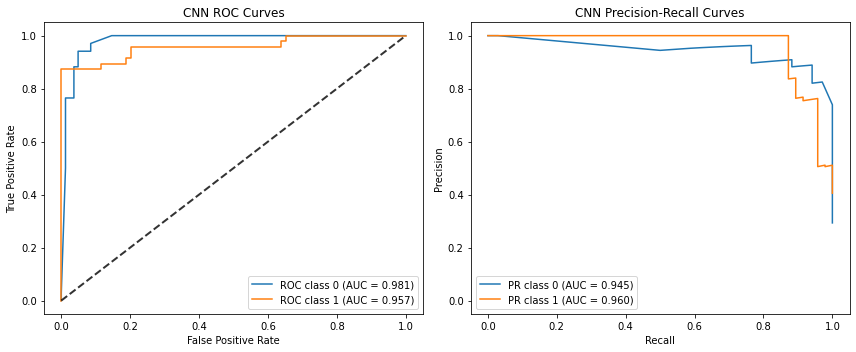

In [49]:
# ... (Previous code remains the same)

############################# Step5: Evaluation #####################

# Create new subplots for ROC curve and PR curve
fig2, [ax11, ax12] = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot ROC curve for each class
for i in range(no_classes):
    fpr_keras, tpr_keras, _ = roc_curve(y_test2[:, i], y_pred_keras[:, i])
    auc_keras = auc(fpr_keras, tpr_keras)
    ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
ax11.legend(loc='lower right')

# Plot PR curve for each class
for i in range(no_classes):
    precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
    pr_auc = auc(recall, precision)
    ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
ax12.legend(loc='lower left')

# Calculate predictions
y_pred = model.predict(X_test2)
y_pred_cls = np.argmax(y_pred, axis=1)

# Calculate and print MCC metrics
conf_matrix = confusion_matrix(y_test, y_pred_cls)
class_report = classification_report(y_test, y_pred_cls)
mcc = matthews_corrcoef(y_test, y_pred_cls)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("MCC:", mcc)

# Show all the plots together
plt.tight_layout()
plt.show()


4/4 [==============================] - 1s 134ms/step
Confusion Matrix:
 [[32  1  1]
 [ 5 40  2]
 [ 0  5 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.87      0.85      0.86        47
           2       0.91      0.86      0.88        35

    accuracy                           0.88       116
   macro avg       0.88      0.88      0.88       116
weighted avg       0.88      0.88      0.88       116

MCC: 0.8177826176422723


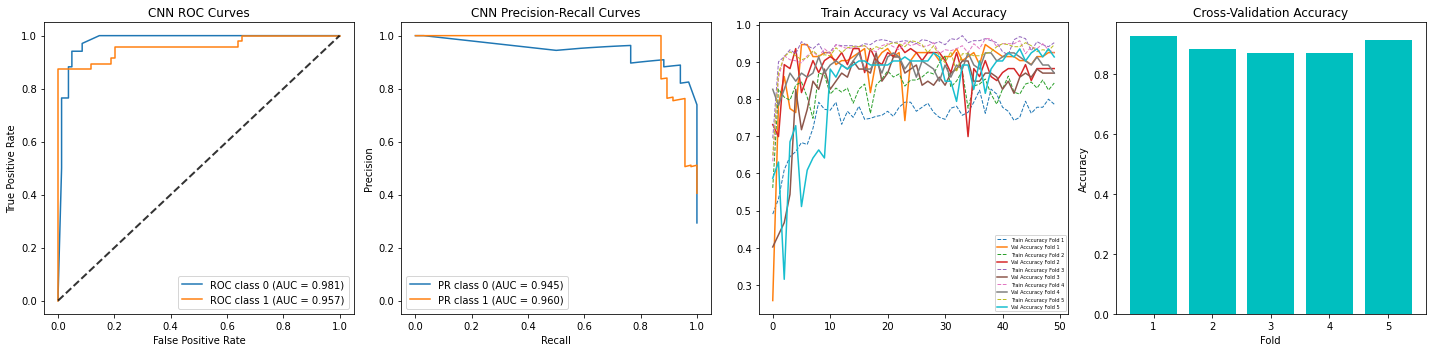

In [54]:
# Create new subplots for the plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax11, ax12, ax13, ax14 = axes

# Plot ROC curve for each class
for i in range(no_classes):
    fpr_keras, tpr_keras, _ = roc_curve(y_test2[:, i], y_pred_keras[:, i])
    auc_keras = auc(fpr_keras, tpr_keras)
    ax11.plot(fpr_keras, tpr_keras, label='ROC class {} (AUC = {:.3f})'.format(i, auc_keras))

ax11.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
ax11.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title="CNN ROC Curves")
ax11.legend(loc='lower right')

# Plot PR curve for each class
for i in range(no_classes):
    precision, recall, _ = precision_recall_curve(y_test2[:, i], y_pred_keras[:, i])
    pr_auc = auc(recall, precision)
    ax12.plot(recall, precision, label='PR class {} (AUC = {:.3f})'.format(i, pr_auc))

ax12.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], xlabel='Recall', ylabel='Precision', title="CNN Precision-Recall Curves")
ax12.legend(loc='lower left')

# Calculate predictions
y_pred = model.predict(X_test2)
y_pred_cls = np.argmax(y_pred, axis=1)

# Calculate and print MCC metrics
conf_matrix = confusion_matrix(y_test, y_pred_cls)
class_report = classification_report(y_test, y_pred_cls)
mcc = matthews_corrcoef(y_test, y_pred_cls)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("MCC:", mcc)

# Plot Train Accuracy vs Val Accuracy for each fold
for fold in range(num_folds):
    ax13.plot(model_history[fold]['acc'], linestyle='--', lw=1, label='Train Accuracy Fold {}'.format(fold + 1))
    ax13.plot(model_history[fold]['val_acc'], label='Val Accuracy Fold {}'.format(fold + 1))

ax13.set(title='Train Accuracy vs Val Accuracy')
ax13.legend(prop={'size': 5})

# Plot Cross-Validation Accuracy for each fold
cross_val_accuracy = [history['val_acc'][-1] for history in model_history]
ax14.bar(range(1, num_folds + 1), cross_val_accuracy, color='c')
ax14.set(title='Cross-Validation Accuracy', xlabel='Fold', ylabel='Accuracy')

# Show all the plots together
plt.tight_layout()
plt.show()

Scanning